In [1]:
import actualNN as nn
import numpy as np
from graph import Graph
from scipy.sparse import csr_matrix

In [2]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a*b

array([ 4, 10, 18])

In [3]:
def make_sparse_adj_matrix(w):
    # Outputs the scipy.sparse adjacency matrix of the graph
    n = np.size(w)
    s = np.sum(w)
    m = ( np.dot(w,w)/s )**2 + s
    m = int(m/2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum,0,0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m,1),wsum)
    J = np.digitize(np.random.rand(m,1),wsum)
    row_ind = np.append(I.reshape(m,)-1,J.reshape(m,)-1)
    col_ind = np.append(J.reshape(m,1)-1,I.reshape(m,)-1)
    ones = [1 for i in range(2*m)]    
    A = csr_matrix((ones, (row_ind,col_ind)), shape=(n,n))
    A.data.fill(1)
    return A

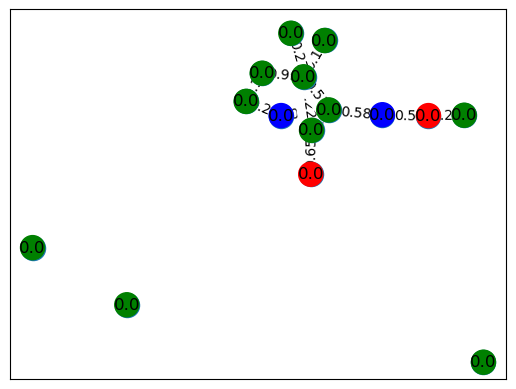

In [5]:

adjacency_matrix =make_sparse_adj_matrix(np.random.pareto(1.5, 15) + 1)
#convert to dense matrix
adjacency_matrix = np.array(adjacency_matrix.todense())
# Define the input and output nodes
input_nodes = [0, 1]
output_nodes = [4, 5]

# Define the neural network
neural_graph = Graph(adjacency_matrix)
neural_network = nn.ActualNeuralNetwork(neural_graph, input_nodes, output_nodes)
neural_network.display()

In [6]:
neural_network.forward_propagation(np.array([[1, 2]]))


array([[0., 1.]])

In [7]:
#mse gradient
g = neural_network.compute_mse_gradient(np.array([[1, 2]]))

In [8]:
print(g.shape)

(15, 15)


In [9]:
neural_network.forward_propagation(np.array([[13, 2], [0, 4], [2, 1]]))

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

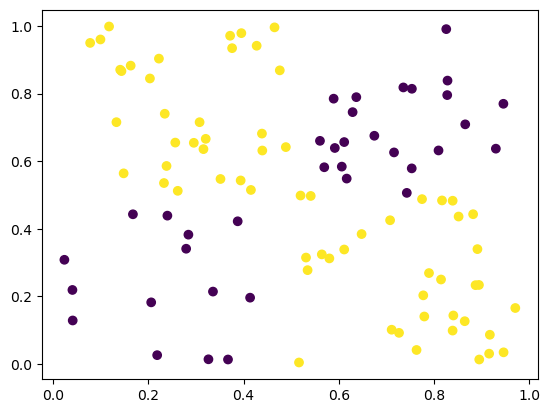

In [8]:
import benchmarks_generator
import matplotlib.pyplot as plt
inputs, outputs = benchmarks_generator.xor_dataset(100)

#plot
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)

In [9]:
#convert output to onehot
outputs_onehot = np.zeros((outputs.shape[0], 2))
outputs_onehot[np.arange(outputs.shape[0]), outputs.astype(int)] = 1

In [20]:
import loss_functions
print(inputs.shape)
#train
ea_result = neural_network.train(inputs.T, outputs_onehot, loss_functions.cross_entropy_loss)

(2, 100)
 num_gens: 6048 fitness: 0.0014414611738006059 loss: 693.74050316136222

KeyboardInterrupt: 

In [21]:
import loss_functions
neural_network.train_gradient_descent(inputs.T, outputs_onehot, 0.0009, 1000, loss_functions.mse)

 num_iterations: 444 fitness: 0.8075761024053583 loss: 1.2382733924660585 gradient: 8.556491863950993e+38

KeyboardInterrupt: 

In [16]:
#plot fitness history
plt.plot(ea_result.fitness_history)
plt.show()

NameError: name 'ea_result' is not defined

In [17]:
for i in range(42):
    plt.plot([mr[i] for mr in ea_result.mr_history])

plt.show()

NameError: name 'ea_result' is not defined

In [14]:
print(neural_network.weights)

[[ 0.          0.          0.          0.          0.         -0.01043181
   0.          0.          0.          0.          0.          0.
  -0.1922043   0.          0.        ]
 [ 0.         -0.16431157  0.          0.23707369 -0.05473331  0.25788809
  -0.01284284  0.1242192  -0.07423214  0.          0.          0.
  -0.15230646  0.05509411  0.        ]
 [ 0.          0.         -0.01105534  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.2362059   0.          0.          0.          0.
   0.         -0.01340563  0.          0.          0.19875801  0.
   0.          0.          0.        ]
 [ 0.         -0.24886464  0.          0.          0.         -0.10137342
   0.          0.          0.12770882  0.          0.          0.
   0.          0.07154419  0.09590825]
 [ 0.05960795 -0.16114295  0.          0.         -0.00220221 -0.06273316
   0.          0.          0.          0.      

In [15]:

print(loss_functions.mse(outputs_onehot, neural_network.forward_propagation(inputs.T)))

28.964454452934454


In [18]:
def accuracy(out_true, out_pred):
    return np.sum(np.argmax(out_true, axis=1) == np.argmax(out_pred, axis=1))/out_true.shape[0]

print(accuracy(outputs_onehot, neural_network.forward_propagation(inputs.T)))

0.64


c:\Users\sacha\Documents\CODE\Python\ActualNNs\actualNN.py:49: RuntimeWarning: invalid value encountered in divide
  output = output/np.sum(output, axis=1)[:, np.newaxis]


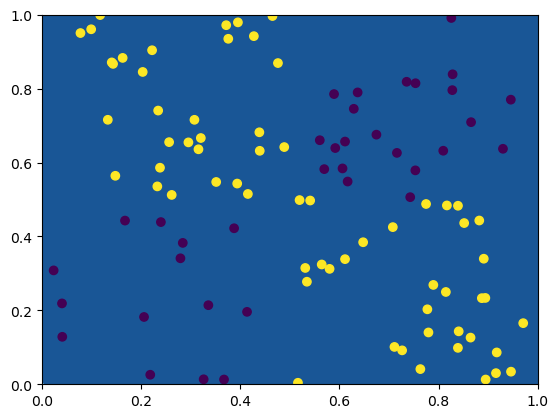

In [19]:
#plot decision boundary
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        z[i, j] = np.argmax(neural_network.forward_propagation(np.array([[xx[i, j], yy[i, j]]])))
plt.contourf(xx, yy, z, cmap='RdBu')
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)
plt.show()
